In [2]:
!pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [3]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [4]:
# Ïó¥ Îã§ Î≥¥Ïù¥Í≤å ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
# Ìñâ Îã§ Î≥¥Ïù¥Í≤å ÏÑ§Ï†ï
pd.set_option('display.max_rows', None)

In [5]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

train_path = '/root/AI_STAGE/upstageailab-ml-competition-ml-2/1.Data/train.csv'
test_path  = '/root/AI_STAGE/upstageailab-ml-competition-ml-2/1.Data/test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [6]:
train.shape, test.shape

((1118822, 52), (9272, 51))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118822 entries, 0 to 1118821
Data columns (total 52 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1118822 non-null  object 
 1   Î≤àÏßÄ                      1118597 non-null  object 
 2   Î≥∏Î≤à                      1118747 non-null  float64
 3   Î∂ÄÎ≤à                      1118747 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1116696 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1118822 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1118822 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1118822 non-null  int64  
 8   Ï∏µ                       1118822 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1118822 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1118822 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 5983 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [8]:
train.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            225
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2126
Ï†ÑÏö©Î©¥Ï†Å(„é°)                         0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1112839
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                          0
Í±∞ÎûòÏú†Ìòï                            0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         870691
k-Ï†ÑÌôîÎ≤àÌò∏                     870274
k-Ìå©Ïä§Î≤àÌò∏                     872742
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1050240
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               869563
k-Í¥ÄÎ¶¨Î∞©Ïãù                     869563
k-Î≥µÎèÑÏú†Ìòï                     869890
k-ÎÇúÎ∞©Î∞©Ïãù                     869563
k-Ï†ÑÏ≤¥ÎèôÏ

In [9]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüº(data)
# trainÍ≥º testÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Í∏∞

train['data'] = 0
test['data'] = 1
concat = pd.concat([train, test])

print(concat.shape)
print(concat['data'].value_counts())

(1128094, 53)
0    1118822
1       9272
Name: data, dtype: int64


In [10]:
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

In [11]:
# Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ

In [12]:
concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 6195 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  1

In [13]:
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                          0
Í±∞ÎûòÏú†Ìòï                            0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

In [14]:
# Ïó¥ Ï†ÑÏ≤¥Î•º ÎÑ£Í≥† Ïä§Ï∫îÌïòÍ∏∞

for col in concat.columns:
    nunique = concat[col].nunique(dropna=False)
    missing_ratio = concat[col].isna().mean()
    missing_count = concat[col].isnull().sum()
    col_type = concat.dtypes[col]
    print(f"üìå {col:30} | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: {col_type} | Í≥†Ïú†Í∞í: {nunique:6} | Í≤∞Ï∏°Í∞úÏàò: {missing_count} | Í≤∞Ï∏°Î•†: {missing_ratio:.2%}")

üìå ÏãúÍµ∞Íµ¨                            | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:    339 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Î≤àÏßÄ                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:   6579 | Í≤∞Ï∏°Í∞úÏàò: 227 | Í≤∞Ï∏°Î•†: 0.02%
üìå Î≥∏Î≤à                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:   1524 | Í≤∞Ï∏°Í∞úÏàò: 75 | Í≤∞Ï∏°Î•†: 0.01%
üìå Î∂ÄÎ≤à                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:    330 | Í≤∞Ï∏°Í∞úÏàò: 75 | Í≤∞Ï∏°Î•†: 0.01%
üìå ÏïÑÌååÌä∏Î™Ö                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:   6550 | Í≤∞Ï∏°Í∞úÏàò: 2136 | Í≤∞Ï∏°Î•†: 0.19%
üìå Ï†ÑÏö©Î©¥Ï†Å                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:  14670 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Í≥ÑÏïΩÎÖÑÏõî                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: int64 | Í≥†Ïú†Í∞í:    201 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Í≥ÑÏïΩÏùº                            | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: int64 | Í≥†Ïú†Í∞í:     31 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†

In [15]:
# Í≤∞Ï∏°ÏπòÎäî ÏïÑÎãåÎç∞ ÏùòÎØ∏ ÏóÜÎäî ÌòïÏãùÏ†Å Í∞í Ï∞æÍ∏∞

def detect_fake_nulls(df, suspect_values=['-', ' ', '', '.', 'ÏóÜÏùå', 'nan']):
    result = {}
    for col in df.columns:
        if concat[col].dtype == 'object':
            val_counts = concat[col].value_counts(dropna=False)
            found = val_counts[val_counts.index.isin(suspect_values)]
            if not found.empty:
                result[col] = found
    return result

fake_nulls = detect_fake_nulls(concat)
for col, vals in fake_nulls.items():
    print(f"üîé {col} Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:")
    print(vals)
    print()

üîé ÎèÑÎ°úÎ™Ö Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
     1211
Name: ÎèÑÎ°úÎ™Ö, dtype: int64

üîé Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
     1111271
Name: Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê, dtype: int64

üîé Í±∞ÎûòÏú†Ìòï Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
-    1086451
Name: Í±∞ÎûòÏú†Ìòï, dtype: int64

üîé Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
-    1090013
Name: Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, dtype: int64

üîé k-ÏãúÌñâÏÇ¨ Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
.    868
-    152
Name: k-ÏãúÌñâÏÇ¨, dtype: int64

üîé k-ÌôàÌéòÏù¥ÏßÄ Ïª¨ÎüºÏóêÏÑú ÏùòÎØ∏ ÏóÜÎäî Í∞í Î∞úÍ≤¨:
ÏóÜÏùå    3628
.       72
Name: k-ÌôàÌéòÏù¥ÏßÄ, dtype: int64



In [16]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['ÎèÑÎ°úÎ™Ö'] = concat['ÎèÑÎ°úÎ™Ö'].replace(' ', np.nan)
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)
concat['k-ÏãúÌñâÏÇ¨'] = concat['k-ÏãúÌñâÏÇ¨'].replace('.', np.nan)
concat['k-ÏãúÌñâÏÇ¨'] = concat['k-ÏãúÌñâÏÇ¨'].replace('-', np.nan)
concat['k-ÌôàÌéòÏù¥ÏßÄ'] = concat['k-ÌôàÌéòÏù¥ÏßÄ'].replace('ÏóÜÏùå', np.nan)
concat['k-ÌôàÌéòÏù¥ÏßÄ'] = concat['k-ÌôàÌéòÏù¥ÏßÄ'].replace('.', np.nan)

In [17]:
# Ïó¥ Ï†ÑÏ≤¥Î•º ÎÑ£Í≥† Ïä§Ï∫îÌïòÍ∏∞

for col in concat.columns:
    nunique = concat[col].nunique(dropna=False)
    missing_ratio = concat[col].isna().mean()
    missing_count = concat[col].isnull().sum()
    col_type = concat.dtypes[col]
    print(f"üìå {col:30} | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: {col_type} | Í≥†Ïú†Í∞í: {nunique:6} | Í≤∞Ï∏°Í∞úÏàò: {missing_count} | Í≤∞Ï∏°Î•†: {missing_ratio:.2%}")

üìå ÏãúÍµ∞Íµ¨                            | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:    339 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Î≤àÏßÄ                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:   6579 | Í≤∞Ï∏°Í∞úÏàò: 227 | Í≤∞Ï∏°Î•†: 0.02%
üìå Î≥∏Î≤à                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:   1524 | Í≤∞Ï∏°Í∞úÏàò: 75 | Í≤∞Ï∏°Î•†: 0.01%
üìå Î∂ÄÎ≤à                             | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:    330 | Í≤∞Ï∏°Í∞úÏàò: 75 | Í≤∞Ï∏°Î•†: 0.01%
üìå ÏïÑÌååÌä∏Î™Ö                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: object | Í≥†Ïú†Í∞í:   6550 | Í≤∞Ï∏°Í∞úÏàò: 2136 | Í≤∞Ï∏°Î•†: 0.19%
üìå Ï†ÑÏö©Î©¥Ï†Å                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: float64 | Í≥†Ïú†Í∞í:  14670 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Í≥ÑÏïΩÎÖÑÏõî                           | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: int64 | Í≥†Ïú†Í∞í:    201 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†: 0.00%
üìå Í≥ÑÏïΩÏùº                            | Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ: int64 | Í≥†Ïú†Í∞í:     31 | Í≤∞Ï∏°Í∞úÏàò: 0 | Í≤∞Ï∏°Î•†

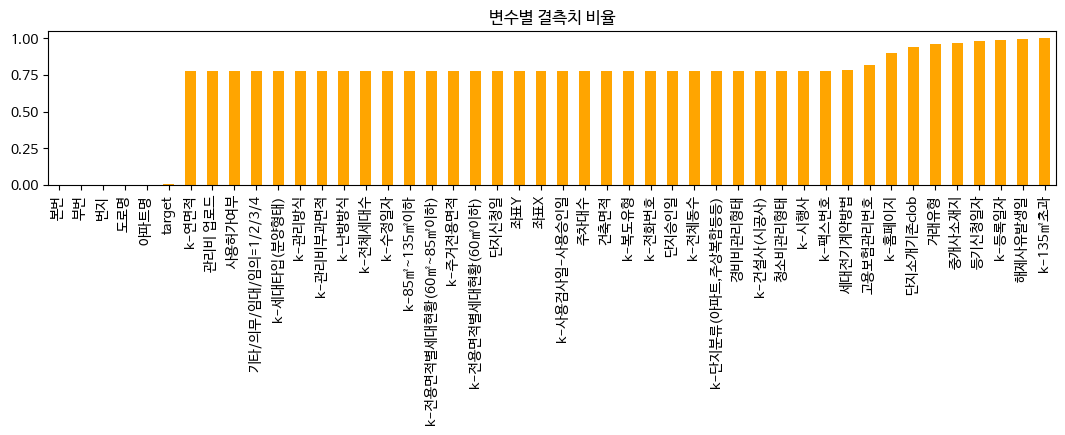

In [18]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

In [19]:
# print(concat.shape[0] * 0.8) = 902475.2000000001
# NullÍ∞íÏù¥ 90ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 90ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 900000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 90ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 900000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 90ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'data']
* Í≤∞Ï∏°ÏπòÍ∞Ä 90ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ : ['

In [20]:
# Í≤∞Ï∏°Ïπò 90ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Í∞íÍ≥º Ïù¥ÌïòÏßÄÎßå ÌïÑÏöîÏóÜÎäî Í≤É Ï†úÏô∏
# ÌïÑÏöîÏóÜÏñ¥ Î≥¥Ïù¥Îäî Í≤É : k-Ï†ÑÌôîÎ≤àÌò∏, k-Ìå©Ïä§Î≤àÌò∏, ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä, Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú, k-ÏàòÏ†ïÏùºÏûê

valid_cols = concat.columns[concat.isnull().sum() <= 900000]
exclude_cols = ['k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'k-ÏàòÏ†ïÏùºÏûê']

select = [col for col in valid_cols if col not in exclude_cols]
concat_select = concat[select]

concat.shape, concat_select.shape

((1128094, 53), (1128094, 39))

In [21]:
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 39 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1126883 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      250821 non-null   object 
 12  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌ

In [22]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [23]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
# Ïà´ÏûêÌòï Î∂ÑÎ¶¨ pd.api.types.is_numeric_dtype
con_columns = []
cat_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        con_columns.append(column)
    else:
        cat_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", con_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", cat_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


In [24]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®
print("üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®:")
for col in con_columns:
    null_ratio = concat_select[col].isnull().mean() * 100
    if null_ratio > 0:
        print(f"üî∏ {col}: {null_ratio:.2f}%")

# Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®
print("\nüìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®:")
for col in cat_columns:
    null_ratio = concat_select[col].isnull().mean() * 100
    if null_ratio > 0:
        print(f"üî∏ {col}: {null_ratio:.2f}%")

üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®:
üî∏ k-Ï†ÑÏ≤¥ÎèôÏàò: 77.76%
üî∏ k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò: 77.66%
üî∏ k-Ïó∞Î©¥Ï†Å: 77.66%
üî∏ k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å: 77.67%
üî∏ k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å: 77.66%
üî∏ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò): 77.67%
üî∏ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò): 77.67%
üî∏ k-85„é°~135„é°Ïù¥Ìïò: 77.67%
üî∏ Í±¥Ï∂ïÎ©¥Ï†Å: 77.68%
üî∏ Ï£ºÏ∞®ÎåÄÏàò: 77.68%
üî∏ Ï¢åÌëúX: 77.67%
üî∏ Ï¢åÌëúY: 77.67%
üî∏ target: 0.82%

üìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÎπÑÏú®:
üî∏ Î≤àÏßÄ: 0.02%
üî∏ ÏïÑÌååÌä∏Î™Ö: 0.19%
üî∏ ÎèÑÎ°úÎ™Ö: 0.11%
üî∏ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±): 77.77%
üî∏ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú): 77.66%
üî∏ k-Í¥ÄÎ¶¨Î∞©Ïãù: 77.66%
üî∏ k-Î≥µÎèÑÏú†Ìòï: 77.69%
üî∏ k-ÎÇúÎ∞©Î∞©Ïãù: 77.66%
üî∏ k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨): 77.80%
üî∏ k-ÏãúÌñâÏÇ¨: 77.91%
üî∏ k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº: 77.68%
üî∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú: 77.79%
üî∏ ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï: 78.49%
üî∏ Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú: 77.81%
üî∏ Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=

In [25]:
def null_summary(df, columns):
    result = pd.DataFrame({
        'Í≤∞Ï∏° Í∞úÏàò': df[columns].isnull().sum(),
        'Í≤∞Ï∏° ÎπÑÏú®(%)': df[columns].isnull().mean() * 100
    })
    return result[result['Í≤∞Ï∏° Í∞úÏàò'] > 0].sort_values('Í≤∞Ï∏° ÎπÑÏú®(%)', ascending=False)

print("üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ")
display(null_summary(concat_select, con_columns))

print("üìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ")
display(null_summary(concat_select, cat_columns))


üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ


Í≤∞Ï∏° Í∞úÏàò   Í≤∞Ï∏° ÎπÑÏú®(%)
k-Ï†ÑÏ≤¥ÎèôÏàò                  877207  77.760098
Í±¥Ï∂ïÎ©¥Ï†Å                    876279  77.677835
Ï£ºÏ∞®ÎåÄÏàò                    876277  77.677658
Ï¢åÌëúX                     876232  77.673669
Ï¢åÌëúY                     876232  77.673669
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                876170  77.668173
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)      876170  77.668173
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  876170  77.668173
k-85„é°~135„é°Ïù¥Ìïò            876170  77.668173
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                 876125  77.664184
k-Ïó∞Î©¥Ï†Å                   876125  77.664184
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å               876125  77.664184
target                    9272   0.821917

üìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ


Í≤∞Ï∏° Í∞úÏàò   Í≤∞Ï∏° ÎπÑÏú®(%)
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï             885389  78.485392
k-ÏãúÌñâÏÇ¨                878854  77.906096
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú              877751  77.808321
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)           877637  77.798215
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú              877561  77.791478
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)   877273  77.765949
Îã®ÏßÄÏäπÏù∏Ïùº                876854  77.728806
k-Î≥µÎèÑÏú†Ìòï               876454  77.693348
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº        876259  77.676062
Îã®ÏßÄÏã†Ï≤≠Ïùº                876187  77.669680
k-ÎÇúÎ∞©Î∞©Ïãù               876125  77.664184
k-Í¥ÄÎ¶¨Î∞©Ïãù               876125  77.664184
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)         876125  77.664184
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  876125  77.664184
ÏïÑÌååÌä∏Î™Ö                   2136   0.189346
ÎèÑÎ°úÎ™Ö                    1211   0.107349
Î≤àÏßÄ                      227   0.020122

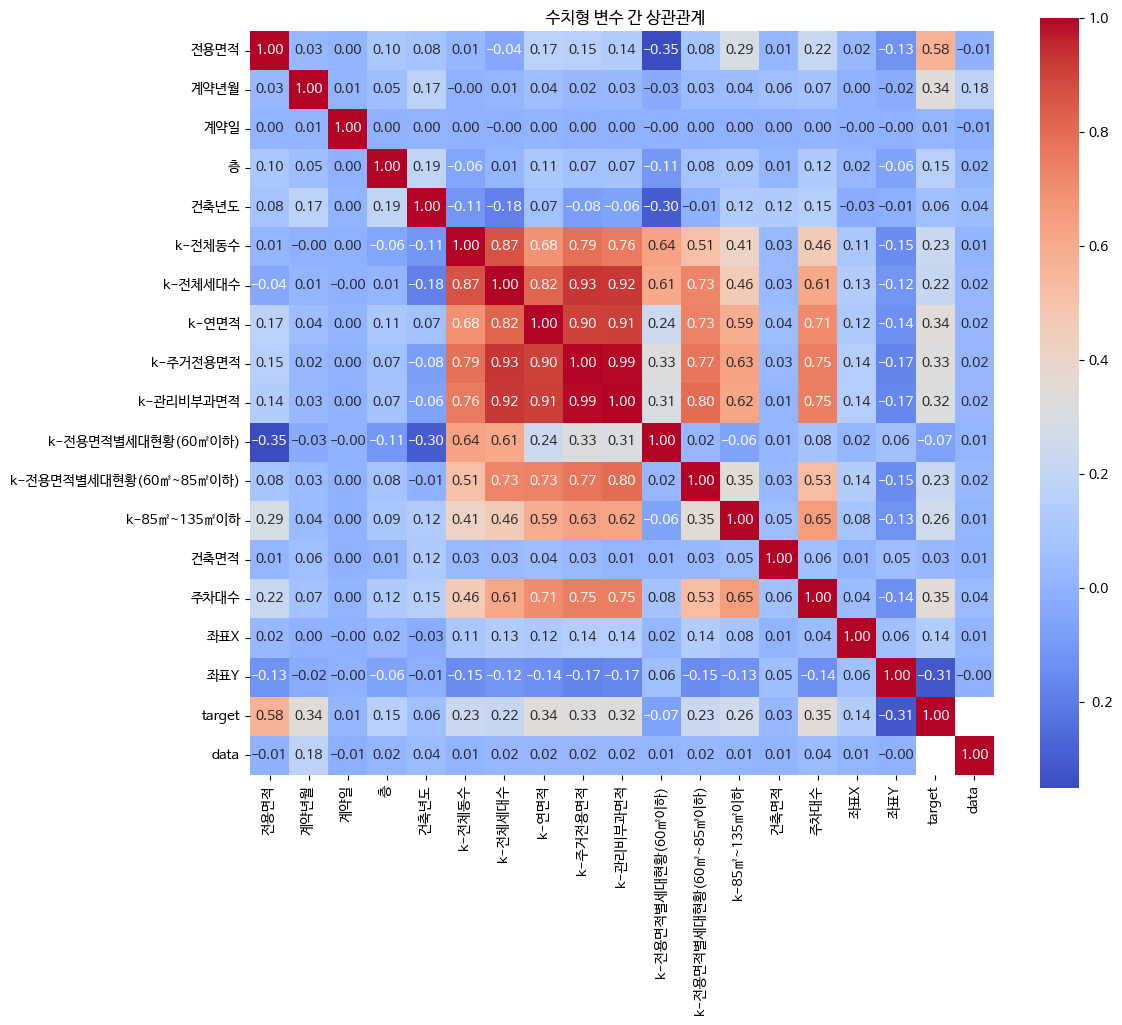

In [26]:
# Í≤∞Ï∏°Ïπò ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨ Ï†Ñ Ïó∞ÏÜçÌòï Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î≥¥Í∏∞

# 1. ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
numeric_cols = concat_select.select_dtypes(include=['float64', 'int64']).columns

# 2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
corr = concat_select[numeric_cols].corr()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("üìä ÏàòÏπòÌòï Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()

In [27]:
#ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í∏∞Î∞òÏúºÎ°ú Ï§ëÎ≥µ feature Ïåç ÌÉêÏßÄ Î∞è ÏÇ≠Ï†ú ÌõÑÎ≥¥ Ï∂îÏ≤ú

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂ú
numeric_cols = con_columns  # ‚Üê ÎÑàÍ∞Ä ÎÇòÎà†Îëî Ïó∞ÏÜçÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä)
corr_matrix = concat_select[numeric_cols].corr().abs()

# ÏÉÅÏÇºÍ∞Å ÌñâÎ†¨Î°ú Ï§ëÎ≥µ Ï†úÍ±∞
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.9 Ï¥àÍ≥ºÏù∏ Î≥ÄÏàòÏåç Ï∂îÏ∂ú
high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if pd.notnull(upper.loc[row, col]) and upper.loc[row, col] > 0.7]

# Ï∂úÎ†•
for col1, col2, score in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"üîÅ {col1} ‚Üî {col2} : ÏÉÅÍ¥ÄÍ≥ÑÏàò = {score:.2f}")


üîÅ k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å ‚Üî k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.99
üîÅ k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å ‚Üî k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.93
üîÅ k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å ‚Üî k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.92
üîÅ k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å ‚Üî k-Ïó∞Î©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.91
üîÅ k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å ‚Üî k-Ïó∞Î©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.90
üîÅ k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò ‚Üî k-Ï†ÑÏ≤¥ÎèôÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.87
üîÅ k-Ïó∞Î©¥Ï†Å ‚Üî k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.82
üîÅ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò) ‚Üî k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.80
üîÅ k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å ‚Üî k-Ï†ÑÏ≤¥ÎèôÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.79
üîÅ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò) ‚Üî k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.77
üîÅ k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å ‚Üî k-Ï†ÑÏ≤¥ÎèôÏàò : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.76
üîÅ Ï£ºÏ∞®ÎåÄÏàò ‚Üî k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.75
üîÅ Ï£ºÏ∞®ÎåÄÏàò ‚Üî k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å : ÏÉÅÍ¥ÄÍ≥ÑÏàò = 0.75
üîÅ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ì

In [28]:
# Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô© pca

pca_cols = [
    'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
    'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)',
    'k-85„é°~135„é°Ïù¥Ìïò'
]
pca_data = concat_select[pca_cols].fillna(0)  # ÌòπÏãú Î™®Î•¥Îãà Í≤∞Ï∏° 0ÏúºÎ°ú ÎåÄÏ≤¥


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 2Í∞ú ÏÑ±Î∂ÑÏúºÎ°ú Ï∂ïÏÜå
pca_components = pca.fit_transform(scaled_pca_data)


In [31]:
print(pca.explained_variance_ratio_)  # Ïòà: [0.83, 0.16]


[0.55723546 0.28291263]


In [32]:
# PCA Í≤∞Í≥º Ï†ÄÏû•
concat_select["ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1"] = pca_components[:, 0]
concat_select["ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2"] = pca_components[:, 1]

# ÏõêÎ≥∏ feature Ï†úÍ±∞
concat_select.drop(columns=pca_cols, inplace=True)


In [33]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  \
0  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0   

   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0   

   k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  \
0    22637.0      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò   

                   Îã®ÏßÄÏäπÏù∏Ïùº        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  \
0  2022-11-17 13:00:29.0  127.05721  37.476763  2022-11-17 10:19:06.0   

     target  data  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2  
0  124000.0     0  -0.030656  -0.171063

In [34]:
drop_cols = ['k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å','k-Ïó∞Î©¥Ï†Å','k-Ï†ÑÏ≤¥ÎèôÏàò']
concat_select.drop(columns=drop_cols, inplace=True)


In [35]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  \
0  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©    270.0   

  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  \
0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   20204.0      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ      ÏßÅÏòÅ   

     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº        Ï¢åÌëúX  \
0  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0  127.05721   

         Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  data  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2  
0  37.476763  2022-11-17 10:19:06.0  124000.0     0  -0.030656  -0.171063

In [36]:
concat_select.shape

(1128094, 35)

In [37]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
# Ïà´ÏûêÌòï Î∂ÑÎ¶¨ pd.api.types.is_numeric_dtype
con_columns2 = []
cat_columns2 = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        con_columns2.append(column)
    else:
        cat_columns2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", con_columns2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", cat_columns2)

def null_summary(df, columns):
    result = pd.DataFrame({
        'Í≤∞Ï∏° Í∞úÏàò': df[columns].isnull().sum(),
        'Í≤∞Ï∏° ÎπÑÏú®(%)': df[columns].isnull().mean() * 100
    })
    return result[result['Í≤∞Ï∏° Í∞úÏàò'] > 0].sort_values('Í≤∞Ï∏° ÎπÑÏú®(%)', ascending=False)

print("üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ")
display(null_summary(concat_select, con_columns2))

print("üìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ")
display(null_summary(concat_select, cat_columns2))


Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data', 'ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1', 'ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']
üìä Ïó∞ÏÜçÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ


Í≤∞Ï∏° Í∞úÏàò   Í≤∞Ï∏° ÎπÑÏú®(%)
Í±¥Ï∂ïÎ©¥Ï†Å      876279  77.677835
Ï£ºÏ∞®ÎåÄÏàò      876277  77.677658
Ï¢åÌëúX       876232  77.673669
Ï¢åÌëúY       876232  77.673669
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  876170  77.668173
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò   876125  77.664184
target      9272   0.821917

üìä Î≤îÏ£ºÌòï Î≥ÄÏàò Í≤∞Ï∏°Ïπò ÏöîÏïΩ


Í≤∞Ï∏° Í∞úÏàò   Í≤∞Ï∏° ÎπÑÏú®(%)
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï             885389  78.485392
k-ÏãúÌñâÏÇ¨                878854  77.906096
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú              877751  77.808321
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)           877637  77.798215
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú              877561  77.791478
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)   877273  77.765949
Îã®ÏßÄÏäπÏù∏Ïùº                876854  77.728806
k-Î≥µÎèÑÏú†Ìòï               876454  77.693348
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº        876259  77.676062
Îã®ÏßÄÏã†Ï≤≠Ïùº                876187  77.669680
k-ÎÇúÎ∞©Î∞©Ïãù               876125  77.664184
k-Í¥ÄÎ¶¨Î∞©Ïãù               876125  77.664184
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)         876125  77.664184
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4  876125  77.664184
ÏïÑÌååÌä∏Î™Ö                   2136   0.189346
ÎèÑÎ°úÎ™Ö                    1211   0.107349
Î≤àÏßÄ                      227   0.020122

In [38]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò Îèô Îã®ÏúÑ ÌèâÍ∑†ÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
# targetÏùÄ Í±¥Îì§ÏßÄ ÎßêÏïÑÎ≥¥Ïûê

concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].str.split().str[1]
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].str.split().str[2]

impute_targets = ['Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']

for col in impute_targets:
    # 1Ï∞®: Îèô Îã®ÏúÑ ÌèâÍ∑†
    concat_select[col] = concat_select.groupby('Îèô')[col].transform(lambda x: x.fillna(x.mean()))
    # 2Ï∞®: Íµ¨ Îã®ÏúÑ ÌèâÍ∑† (Îèô ÌèâÍ∑†Ïù¥ Ïïà ÎêòÎ©¥ Ïó¨Í∏∞ÏÑú)
    concat_select[col] = concat_select.groupby('Íµ¨')[col].transform(lambda x: x.fillna(x.mean()))
    # 3Ï∞®: Ï†ÑÏ≤¥ ÌèâÍ∑† (Íµ¨ ÌèâÍ∑†ÎèÑ Ïïà ÎêòÎ©¥ Ïó¨Í∏∞ÏÑú)
    concat_select[col].fillna(concat_select[col].mean(), inplace=True)



In [39]:
concat_select.groupby('Îèô')['Ï£ºÏ∞®ÎåÄÏàò'].mean().isna().sum()


0

In [40]:
for col in impute_targets:
    print(f"{col} Í≤∞Ï∏°Ïπò Ïàò: {concat_select[col].isnull().sum()}")

Í±¥Ï∂ïÎ©¥Ï†Å Í≤∞Ï∏°Ïπò Ïàò: 0
Ï£ºÏ∞®ÎåÄÏàò Í≤∞Ï∏°Ïπò Ïàò: 0
Ï¢åÌëúX Í≤∞Ï∏°Ïπò Ïàò: 0
Ï¢åÌëúY Í≤∞Ï∏°Ïπò Ïàò: 0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å Í≤∞Ï∏°Ïπò Ïàò: 0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Í≤∞Ï∏°Ïπò Ïàò: 0


In [41]:
cat_with_na = [
    'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'k-ÏãúÌñâÏÇ¨', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)',
    'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'Îã®ÏßÄÏäπÏù∏Ïùº',
    'k-Î≥µÎèÑÏú†Ìòï', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Îã®ÏßÄÏã†Ï≤≠Ïùº',
    'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
    'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Î≤àÏßÄ'
]

for col in cat_with_na:
    concat_select[col + '_was_na'] = concat_select[col].isnull().astype(int)
    concat_select[col] = concat_select[col].fillna("Unknown")


In [42]:
concat_select.isnull().sum()

ÏãúÍµ∞Íµ¨                              0
Î≤àÏßÄ                               0
Î≥∏Î≤à                               0
Î∂ÄÎ≤à                               0
ÏïÑÌååÌä∏Î™Ö                             0
Ï†ÑÏö©Î©¥Ï†Å                             0
Í≥ÑÏïΩÎÖÑÏõî                             0
Í≥ÑÏïΩÏùº                              0
Ï∏µ                                0
Í±¥Ï∂ïÎÖÑÎèÑ                             0
ÎèÑÎ°úÎ™Ö                              0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)               0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)                     0
k-Í¥ÄÎ¶¨Î∞©Ïãù                           0
k-Î≥µÎèÑÏú†Ìòï                           0
k-ÎÇúÎ∞©Î∞©Ïãù                           0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                          0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                       0
k-ÏãúÌñâÏÇ¨                            0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº                    0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                         0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú                          0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  

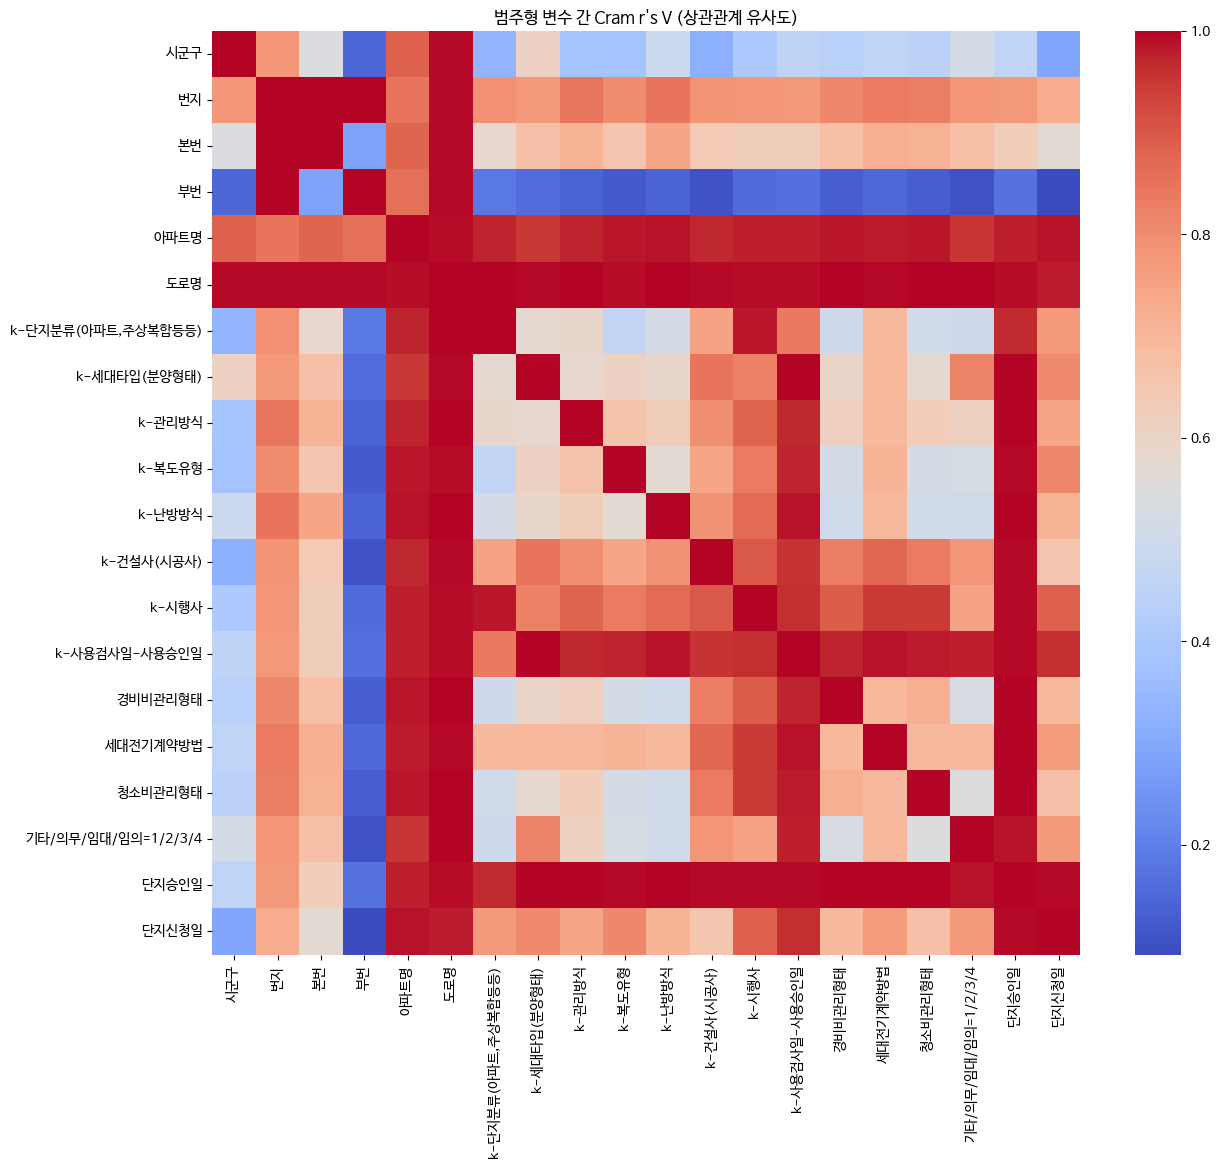

In [43]:
# Î≤îÏ£ºÌòï featureÎì§ Í¥ÄÍ≥Ñ Î≥¥Í∏∞

from scipy.stats import chi2_contingency

# Cram√©r's V Í≥ÑÏÇ∞ Ìï®Ïàò
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏
cat_cols = cat_columns2  # Ïù¥ÎØ∏ ÎÇòÎàà Î¶¨Ïä§Ìä∏

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Îß§Ìä∏Î¶≠Ïä§
cramer_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            try:
                cramer_matrix.loc[col1, col2] = cramers_v(concat_select[col1], concat_select[col2])
            except:
                cramer_matrix.loc[col1, col2] = np.nan

plt.figure(figsize=(14, 12))
sns.heatmap(cramer_matrix.astype(float), cmap='coolwarm', annot=False)
plt.title("Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞Ñ Cram√©r's V (ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïú†ÏÇ¨ÎèÑ)")
plt.show()


In [44]:
# Î≥ÄÏ£ºÌòï Ï§ë uniqueÍ∞íÏù¥ ÎÇÆÏùÄ Í≤É
for col in cat_columns2:
    print(f"{col}: {concat_select[col].nunique()}")


ÏãúÍµ∞Íµ¨: 339
Î≤àÏßÄ: 6579
Î≥∏Î≤à: 1524
Î∂ÄÎ≤à: 330
ÏïÑÌååÌä∏Î™Ö: 6550
ÎèÑÎ°úÎ™Ö: 9245
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±): 6
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú): 4
k-Í¥ÄÎ¶¨Î∞©Ïãù: 4
k-Î≥µÎèÑÏú†Ìòï: 6
k-ÎÇúÎ∞©Î∞©Ïãù: 5
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨): 345
k-ÏãúÌñâÏÇ¨: 555
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº: 675
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú: 5
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï: 3
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú: 5
Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4: 5
Îã®ÏßÄÏäπÏù∏Ïùº: 737
Îã®ÏßÄÏã†Ï≤≠Ïùº: 261


In [45]:
threshold = 0.8
high_corr_pairs = []

for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        val = cramer_matrix.loc[col1, col2]
        if pd.notnull(val) and float(val) >= threshold:
            high_corr_pairs.append((col1, col2, float(val)))

for col1, col2, score in sorted(high_corr_pairs, key=lambda x: -x[2]):
    print(f"üîÅ {col1} ‚Üî {col2} : Cram√©r's V = {score:.2f}")


üîÅ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ Î≤àÏßÄ ‚Üî Î≥∏Î≤à : Cram√©r's V = 1.00
üîÅ k-ÎÇúÎ∞©Î∞©Ïãù ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ Î≤àÏßÄ ‚Üî Î∂ÄÎ≤à : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4 : Cram√©r's V = 1.00
üîÅ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî k-Í¥ÄÎ¶¨Î∞©Ïãù : Cram√©r's V = 1.00
üîÅ ÎèÑÎ°úÎ™Ö ‚Üî k-ÎÇúÎ∞©Î∞©Ïãù : Cram√©r's V = 1.00
üîÅ k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) ‚Üî k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ k-Í¥ÄÎ¶¨Î∞©Ïãù ‚Üî Îã®ÏßÄÏäπÏù∏Ïùº : Cram√©r's V = 1.00
üîÅ ÏãúÍµ∞Íµ¨ ‚Üî Î

In [46]:
drop_cat_cols = [
    'Î≥∏Î≤à',
    'Î∂ÄÎ≤à',
    'ÎèÑÎ°úÎ™Ö',
    'Îã®ÏßÄÏäπÏù∏Ïùº',
    'Îã®ÏßÄÏã†Ï≤≠Ïùº',
    'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)',
    'k-Í¥ÄÎ¶¨Î∞©Ïãù',
    'k-ÎÇúÎ∞©Î∞©Ïãù',
    'k-Î≥µÎèÑÏú†Ìòï',
    'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï',
    'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
    'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú',
    'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
]

# Ï†úÍ±∞ Ï†ÅÏö©
concat_select.drop(columns=drop_cat_cols, inplace=True)

# Ï†úÍ±∞ ÌõÑ Í≤∞Í≥º ÌôïÏù∏
print(f"‚úÖ Ï†úÍ±∞ ÏôÑÎ£å! ÌòÑÏû¨ Î≥ÄÏàò Ïàò: {concat_select.shape[1]}")

‚úÖ Ï†úÍ±∞ ÏôÑÎ£å! ÌòÑÏû¨ Î≥ÄÏàò Ïàò: 41


In [47]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
0                ÏïÑÌååÌä∏    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   

   k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX        Ï¢åÌëúY    target  data  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1  \
0   20204.0  4858.0  262.0  127.05721  37.476763  124000.0     0  -0.030656   

   ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2    Íµ¨    Îèô  ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï_was_na  k-ÏãúÌñâÏÇ¨_was_na  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú_was_na  \
0  -0.171063  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô                0             0               0   

   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)_was_na  Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú_was_na  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)_was_na  Îã®ÏßÄÏäπÏù∏Ïùº_was_na  \
0                  0               0                          0             0   

   k-Î≥µÎèÑÏú†Ìòï_was_na  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº_was_na  Îã®ÏßÄÏã†Ï≤≠Ïùº_was_na  k-ÎÇúÎ∞©Î∞©Ïãù_was_na  \
0              0                     0             0              0   

   k-Í¥ÄÎ¶¨Î∞©Ïãù_was_na  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)_was_na  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4_was_na  \
0              0                    0                           0   

   ÏïÑÌååÌä∏Î™Ö_was_na  ÎèÑÎ°úÎ™Ö_was_na  Î≤àÏßÄ_was_na  
0            0           0          0

In [48]:
# "_was_na"Î°ú ÎÅùÎÇòÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
na_flag_cols = [col for col in concat_select.columns if col.endswith('_was_na')]

# Ï†úÍ±∞
concat_select.drop(columns=na_flag_cols, inplace=True)

# ÌôïÏù∏
print(f"üßπ ÏÇ≠Ï†ú ÏôÑÎ£å! Ï†úÍ±∞Îêú Ïàò: {len(na_flag_cols)}Í∞ú")


üßπ ÏÇ≠Ï†ú ÏôÑÎ£å! Ï†úÍ±∞Îêú Ïàò: 17Í∞ú


In [49]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
0                ÏïÑÌååÌä∏    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   

   k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX        Ï¢åÌëúY    target  data  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1  \
0   20204.0  4858.0  262.0  127.05721  37.476763  124000.0     0  -0.030656   

   ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2    Íµ¨    Îèô  
0  -0.171063  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô

In [50]:
import pandas as pd

# Îπà Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
con_columns_final = []
cat_columns_final = []

# ÌòÑÏû¨ concat_filtered Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ Î∂ÑÎ¶¨
for col in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[col]):
        con_columns_final.append(col)
    else:
        cat_columns_final.append(col)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò:", con_columns_final)
print("‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò:", cat_columns_final)
print(f"üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: {len(con_columns_final)}")
print(f"üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: {len(cat_columns_final)}")


‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data', 'ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1', 'ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2']
‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Íµ¨', 'Îèô']
üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: 15
üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: 9


In [51]:
# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨

In [52]:
def detect_outliers_iqr(df, columns, iqr_scale=1.5):
    outlier_summary = []

    for col in columns:
        if df[col].isnull().all():
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_scale * IQR
        upper_bound = Q3 + iqr_scale * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_ratio = outlier_count / df.shape[0] * 100

        outlier_summary.append({
            'Î≥ÄÏàò': col,
            'Ïù¥ÏÉÅÏπò Í∞úÏàò': outlier_count,
            'Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)': round(outlier_ratio, 2)
        })

    return pd.DataFrame(outlier_summary).sort_values('Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)', ascending=False)


In [53]:
# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
train_data = concat_select[concat_select['data'] == 0]

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ÏöîÏïΩÌëú ÏÉùÏÑ±
outlier_df = detect_outliers_iqr(train_data, con_columns_final)

# Ï∂úÎ†•
import pandas as pd
pd.set_option('display.max_rows', 100)  # Í∏∏Ïñ¥ÎèÑ ÏûòÎ¶º Î∞©ÏßÄ
display(outlier_df)


Î≥ÄÏàò  Ïù¥ÏÉÅÏπò Í∞úÏàò  Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)
13  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1  247785      22.15
14  ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2  247785      22.15
7        Í±¥Ï∂ïÎ©¥Ï†Å  139756      12.49
6    k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å   99291       8.87
0        Ï†ÑÏö©Î©¥Ï†Å   89248       7.98
11     target   75622       6.76
8        Ï£ºÏ∞®ÎåÄÏàò   73692       6.59
5     k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò   63530       5.68
3           Ï∏µ   17009       1.52
4        Í±¥Ï∂ïÎÖÑÎèÑ    4743       0.42
1        Í≥ÑÏïΩÎÖÑÏõî       0       0.00
2         Í≥ÑÏïΩÏùº       0       0.00
9         Ï¢åÌëúX       0       0.00
10        Ï¢åÌëúY       0       0.00
12       data       0       0.00

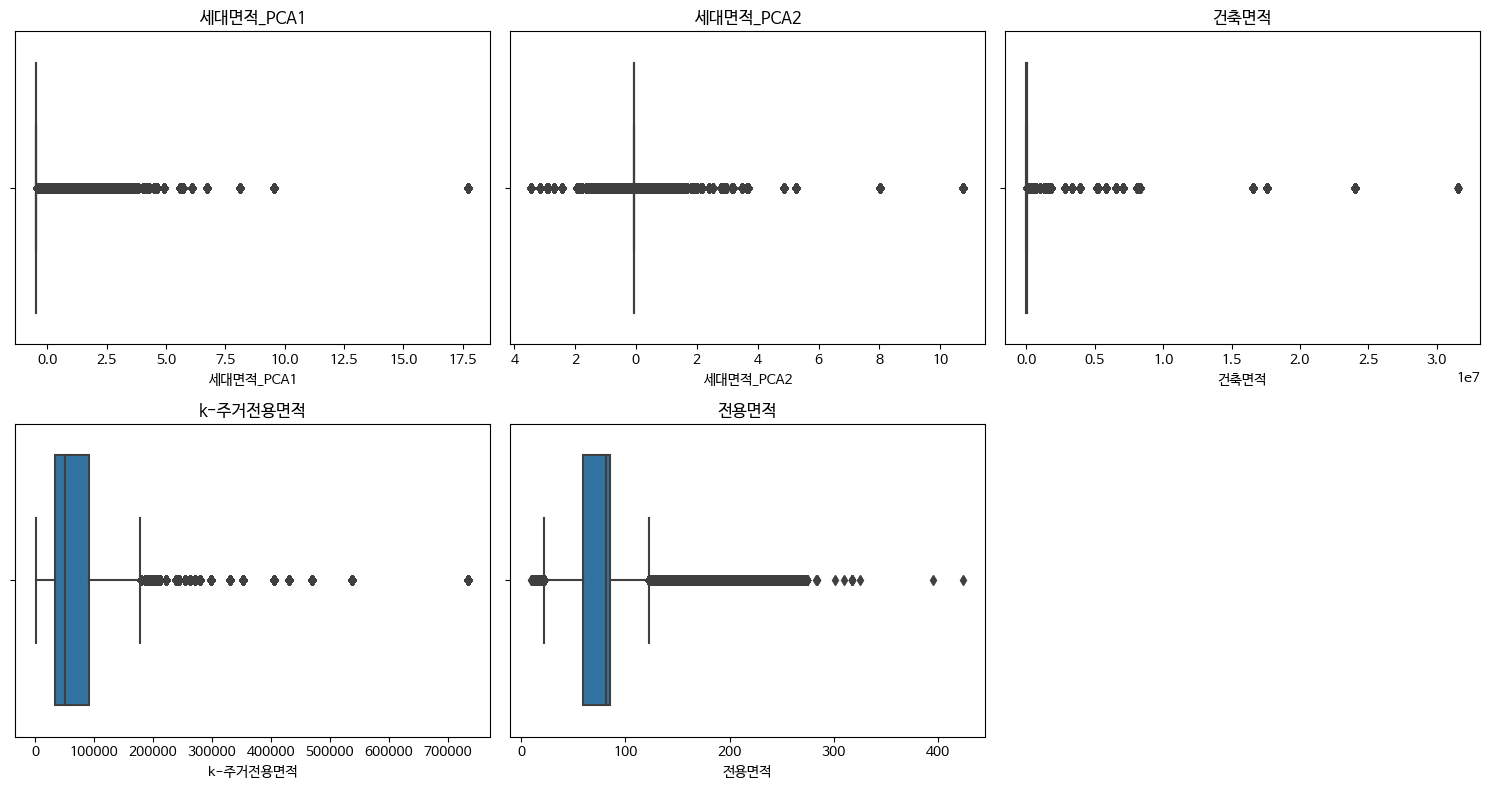

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ïù¥ÏÉÅÏπò ÎπÑÏú® ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò Ï∂îÏ∂ú
top_outlier_cols = outlier_df['Î≥ÄÏàò'].head(5)

# Boxplot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# pca ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏßÄÎèÑ ÏïäÍ≥† Ïù¥ÏÉÅÏπòÎèÑ ÎßéÏïÑÏÑú pca Ï†úÍ±∞
# ÏõêÎ≥∏ k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò) Í∞ÄÏ†∏Ïò§Í∏∞

# 1. PCAÎ°ú ÎßåÎì† feature Ï†úÍ±∞
pca_cols = ['ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA1', 'ÏÑ∏ÎåÄÎ©¥Ï†Å_PCA2']
concat_select.drop(columns=pca_cols, inplace=True, errors='ignore')

# 2. ÏõêÎ≥∏ÏóêÏÑú ÌäπÏ†ï Î≥ÄÏàòÎßå Í∞ÄÏ†∏ÏôÄÏÑú Ï∂îÍ∞Ä
selected_feature = 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)'
concat_select[selected_feature] = concat[selected_feature]

print("‚úÖ PCA ÏÇ≠Ï†ú Î∞è ÏõêÎ≥∏ feature Î≥µÏõê ÏôÑÎ£å")


‚úÖ PCA ÏÇ≠Ï†ú Î∞è ÏõêÎ≥∏ feature Î≥µÏõê ÏôÑÎ£å


In [58]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97  201712    8  3  1987   

  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
0                ÏïÑÌååÌä∏    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   

   k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX        Ï¢åÌëúY    target  data    Íµ¨    Îèô  \
0   20204.0  4858.0  262.0  127.05721  37.476763  124000.0     0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  
0                   250.0

In [ ]:
# concat_selectÍ∞Ä ÏïÑÎãå concatÏóêÏÑú Í∞ÄÏ†∏ÏôÄÏÑú Í≤∞Ï∏°Ïπò ÌôïÏù∏

concat_select['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)'].isnull().sum()

876170

In [ ]:
# Í≤∞Ï∏°ÏπòÎäî Îèô/Íµ¨/Ï†ÑÏ≤¥ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏö∞Í∏∞

impute2_targets = ['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)']

for col in impute2_targets:
    # 1Ï∞®: Îèô Îã®ÏúÑ ÌèâÍ∑†
    concat_select[col] = concat_select.groupby('Îèô')[col].transform(lambda x: x.fillna(x.mean()))
    # 2Ï∞®: Íµ¨ Îã®ÏúÑ ÌèâÍ∑† (Îèô ÌèâÍ∑†Ïù¥ Ïïà ÎêòÎ©¥ Ïó¨Í∏∞ÏÑú)
    concat_select[col] = concat_select.groupby('Íµ¨')[col].transform(lambda x: x.fillna(x.mean()))
    # 3Ï∞®: Ï†ÑÏ≤¥ ÌèâÍ∑† (Íµ¨ ÌèâÍ∑†ÎèÑ Ïïà ÎêòÎ©¥ Ïó¨Í∏∞ÏÑú)
    concat_select[col].fillna(concat_select[col].mean(), inplace=True)

In [63]:
concat_select['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)'].isnull().sum()

0

In [67]:
import pandas as pd

# Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
con_columns_final = []
cat_columns_final = []

# concat_select Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨
for col in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[col]):
        con_columns_final.append(col)
    else:
        cat_columns_final.append(col)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò:", con_columns_final)
print("‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò:", cat_columns_final)
print(f"üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: {len(con_columns_final)}")
print(f"üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: {len(cat_columns_final)}")


‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)']
‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Íµ¨', 'Îèô']
üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: 14
üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: 9


In [68]:
def detect_outliers_iqr(df, columns, iqr_scale=1.5):
    outlier_summary = []

    for col in columns:
        if df[col].isnull().all():
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_scale * IQR
        upper_bound = Q3 + iqr_scale * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_ratio = outlier_count / df.shape[0] * 100

        outlier_summary.append({
            'Î≥ÄÏàò': col,
            'Ïù¥ÏÉÅÏπò Í∞úÏàò': outlier_count,
            'Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)': round(outlier_ratio, 2)
        })

    return pd.DataFrame(outlier_summary).sort_values('Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)', ascending=False)


In [69]:
# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
train_data = concat_select[concat_select['data'] == 0]

# Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ÏöîÏïΩÌëú ÏÉùÏÑ±
outlier_df = detect_outliers_iqr(train_data, con_columns_final)

# Ï∂úÎ†•
import pandas as pd
pd.set_option('display.max_rows', 100)  # Í∏∏Ïñ¥ÎèÑ ÏûòÎ¶º Î∞©ÏßÄ
display(outlier_df)


Î≥ÄÏàò  Ïù¥ÏÉÅÏπò Í∞úÏàò  Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)
7                     Í±¥Ï∂ïÎ©¥Ï†Å  139756      12.49
6                 k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å   99291       8.87
0                     Ï†ÑÏö©Î©¥Ï†Å   89248       7.98
13  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)   85569       7.65
11                  target   75622       6.76
8                     Ï£ºÏ∞®ÎåÄÏàò   73692       6.59
5                  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò   63530       5.68
3                        Ï∏µ   17009       1.52
4                     Í±¥Ï∂ïÎÖÑÎèÑ    4743       0.42
1                     Í≥ÑÏïΩÎÖÑÏõî       0       0.00
2                      Í≥ÑÏïΩÏùº       0       0.00
9                      Ï¢åÌëúX       0       0.00
10                     Ï¢åÌëúY       0       0.00
12                    data       0       0.00

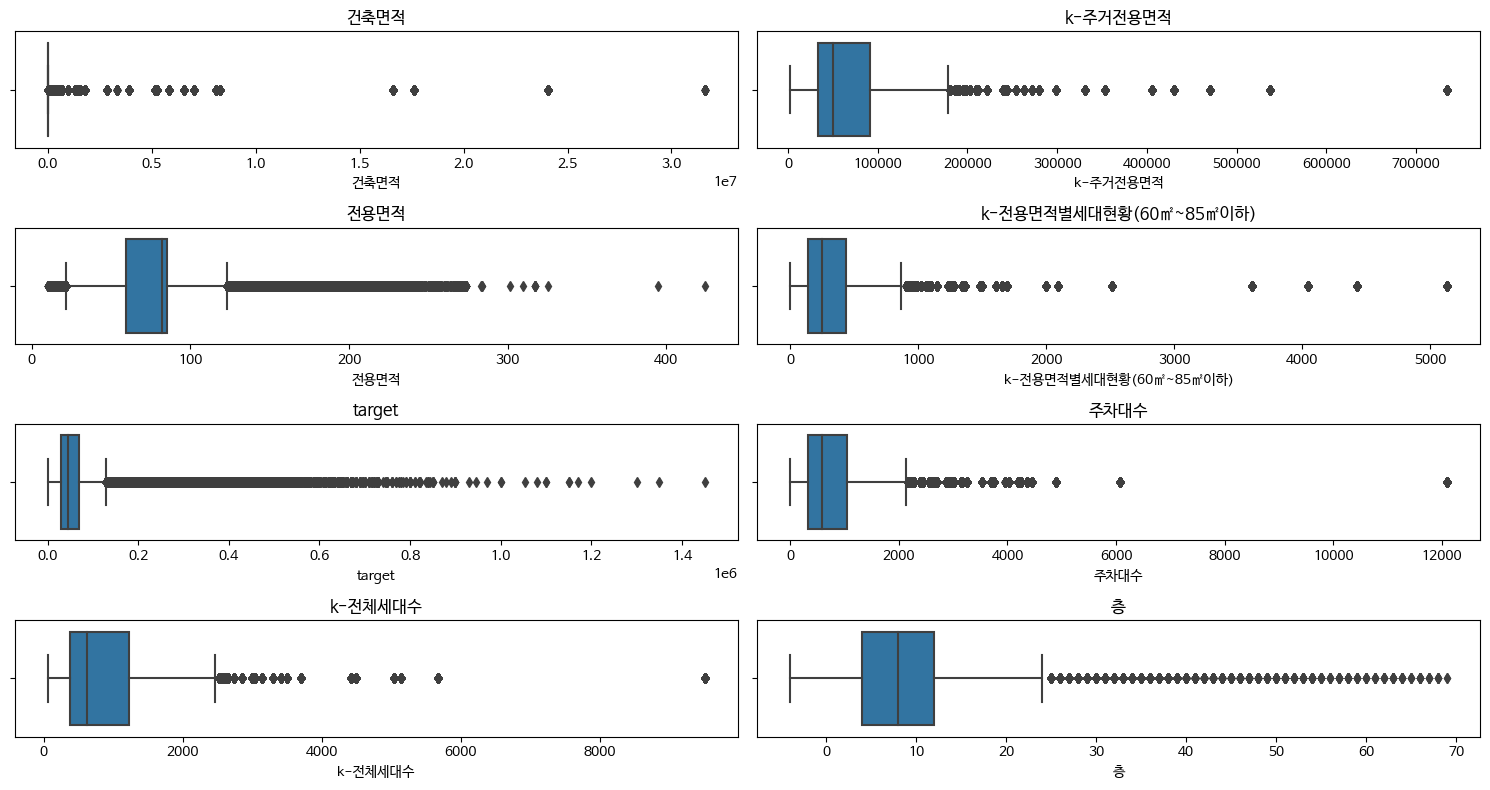

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ïù¥ÏÉÅÏπò ÎπÑÏú® ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò Ï∂îÏ∂ú
top_outlier_cols = outlier_df['Î≥ÄÏàò'].head(8)

# Boxplot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=train_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [73]:
def clip_iqr(df, columns, k=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - k * IQR
        upper = Q3 + k * IQR
        df[col] = df[col].clip(lower, upper)
    return df

clip_cols = ['Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ï£ºÏ∞®ÎåÄÏàò']

concat_select = clip_iqr(concat_select, clip_cols)

In [74]:
concat_select['ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò'] = concat_select['Ï£ºÏ∞®ÎåÄÏàò'] / (concat_select['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] + 1)

In [75]:
concat_select.columns

Index(['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº',
       'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data', 'Íµ¨', 'Îèô',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò'],
      dtype='object')

In [76]:
# Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
con_columns_final = []
cat_columns_final = []

# concat_select Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨
for col in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[col]):
        con_columns_final.append(col)
    else:
        cat_columns_final.append(col)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò:", con_columns_final)
print("‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò:", cat_columns_final)
print(f"üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: {len(con_columns_final)}")
print(f"üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: {len(cat_columns_final)}")


‚úÖ Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'data', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò']
‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Íµ¨', 'Îèô']
üìä Ï¥ù Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞úÏàò: 15
üìÅ Ï¥ù Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: 9


In [78]:
concat_select.shape

(1128094, 24)

In [79]:
# ÌååÏÉùÎ≥ÄÏàò ÎßåÎì§Í∏∞

In [80]:
concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [81]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987                ÏïÑÌååÌä∏   

   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò  \
0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   20204.0  4858.0  262.0   

         Ï¢åÌëúX        Ï¢åÌëúY    target  data    Íµ¨    Îèô  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
0  127.05721  37.476763  124000.0     0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô                   250.0   

   ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  
0   0.96679  2017  12

In [82]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.128094e+06
mean     1.998791e+03
std      9.358540e+00
min      1.961000e+03
10%      1.986000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.010000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [83]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [84]:
concat_select.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987                ÏïÑÌååÌä∏   

   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò  \
0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§    Î™®Î¶Ñ  1987-11-21 00:00:00.0   20204.0  4858.0  262.0   

         Ï¢åÌëúX        Ï¢åÌëúY    target  data    Íµ¨    Îèô  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  \
0  127.05721  37.476763  124000.0     0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô                   250.0   

   ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Ïã†Ï∂ïÏó¨Î∂Ä  
0   0.96679  2017  12     0

In [85]:
concat_select.shape

(1128094, 26)

In [86]:
# Î™®Îç∏ ÌïôÏäµ

In [87]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('data==0')
dt_test = concat_select.query('data==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['data'], axis = 1, inplace=True)
dt_test.drop(['data'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1118822, 25) (9272, 25)


In [88]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©

In [89]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_final = []
categorical_columns_final = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_final.append(column)
    else:
        categorical_columns_final.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_final)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_final)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò', 'Ïã†Ï∂ïÏó¨Î∂Ä']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [90]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_final ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 11/11 [00:02<00:00,  3.82it/s]


In [91]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [92]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [95]:
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
# Ï£ºÌîºÌÑ∞ÎÇò ÏΩîÎû© ÌôòÍ≤ΩÏóêÏÑúÎäî Ïã§Ìñâ Îê®
#%%time
# model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
# model.fit(X_train, y_train)
# pred = model.predict(X_val)

import time

start = time.time()

model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

end = time.time()
print(f"‚è± Ïã§Ìñâ ÏãúÍ∞Ñ: {end - start:.2f}Ï¥à")


‚è± Ïã§Ìñâ ÏãúÍ∞Ñ: 7.55Ï¥à


In [96]:
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 9691.07260667794


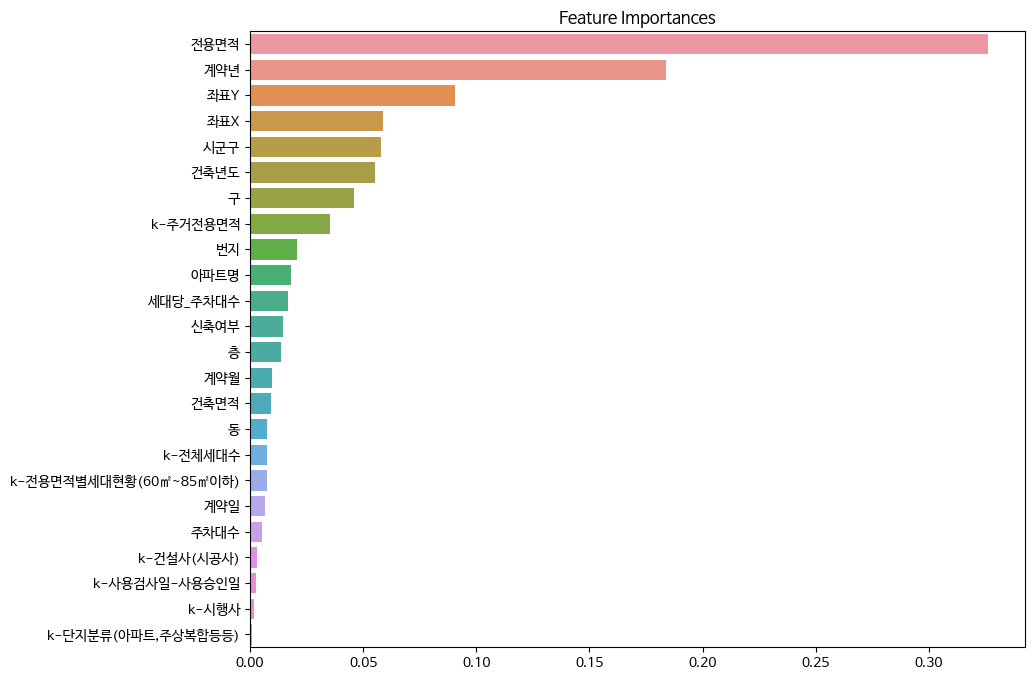

In [97]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [98]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model_com2', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# feature selection

In [99]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)

eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

In [100]:
# valid prediction

In [101]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [102]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [103]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [104]:
X_val_sort.head()

ÏãúÍµ∞Íµ¨    Î≤àÏßÄ  ÏïÑÌååÌä∏Î™Ö     Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
224567    13   745   111  122.925   28  16  2020                   0   
221950   254  3113  1848  122.925   21   2  2019                   0   
534732   254  5784  5930  122.925   31   3  2011                   3   
635912   254  5784  5930  122.925   13   3  2011                   3   
1001952  240  2070  4465  122.925   21  37  2009                   0   

            k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏãúÌñâÏÇ¨  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº       k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
224567   559.085576          77     67            673   54883.743961   
221950   484.715732          77     67            673   73561.707165   
534732   600.000000         103    505            458  112634.000000   
635912   600.000000         103    505            458  112634.000000   
1001952  936.017076          77     67            673   88141.765920   

                 Í±¥Ï∂ïÎ©¥Ï†Å         Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY   Íµ¨    Îèô  \
224567    1960.319317   873.635611  127.055240  37.524137   0  286   
221950   19578.250966  1132.843458  127.008197  37.535023  20  312   
534732   24782.516194  1717.000000  127.009496  37.536978  20  312   
635912   24782.516194  1717.000000  127.009496  37.536978  20  312   
1001952   5506.952875  1218.096200  126.975925  37.529313  20  235   

         k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Ïã†Ï∂ïÏó¨Î∂Ä     target  \
224567                83.577640  1.559825   15    3     1  1450000.0   
221950                68.426791  2.332318   16    5     1   465000.0   
534732                 0.000000  2.856905    9   11     1   820000.0   
635912                 0.000000  2.856905    9    0     1   315000.0   
1001952              276.711360  1.299972    2   11     1   565000.0   

             pred         error  
224567   791814.0  4.332088e+11  
221950   940000.0  2.256250e+11  
534732   368000.0  2.043040e+11  
635912   757600.0  1.958948e+11  
1001952  143640.0  1.775442e+11

In [105]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [107]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_final :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_final :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [108]:
display(error_top100.head(1))
display(best_top100.head(1))

ÏãúÍµ∞Íµ¨   Î≤àÏßÄ   ÏïÑÌååÌä∏Î™Ö     Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
224567  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ï≤≠Îã¥Îèô  129  PH129  122.925   28  16  2020            Unknown   

           k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)    k-ÏãúÌñâÏÇ¨ k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº      k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  \
224567  559.085576    Unknown  Unknown       Unknown  54883.743961   

               Í±¥Ï∂ïÎ©¥Ï†Å        Ï£ºÏ∞®ÎåÄÏàò        Ï¢åÌëúX        Ï¢åÌëúY    Íµ¨    Îèô  \
224567  1960.319317  873.635611  127.05524  37.524137  Í∞ïÎÇ®Íµ¨  Ï≤≠Îã¥Îèô   

        k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Ïã†Ï∂ïÏó¨Î∂Ä     target      pred  \
224567                83.57764  1.559825  2022  04     1  1450000.0  791814.0   

               error  
224567  4.332088e+11

ÏãúÍµ∞Íµ¨    Î≤àÏßÄ  ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
1000223  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏòÅÎì±Ìè¨Íµ¨ ÎãπÏÇ∞Îèô2Í∞Ä  16-1  ÎãπÏÇ∞ÎåÄÏö∞  32.62   16  25  1999   

        k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)    k-ÏãúÌñâÏÇ¨ k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  \
1000223            Unknown  676.207511    Unknown  Unknown       Unknown   

             k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å          Í±¥Ï∂ïÎ©¥Ï†Å        Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX        Ï¢åÌëúY     Íµ¨  \
1000223  58268.165765  24782.516194  827.249478  126.906587  37.515469  ÏòÅÎì±Ìè¨Íµ¨   

             Îèô  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî  Ïã†Ï∂ïÏó¨Î∂Ä   target  \
1000223  ÎãπÏÇ∞Îèô2Í∞Ä              365.212129   1.22156  2009  12     0  15000.0   

            pred  error  
1000223  15000.0    0.0

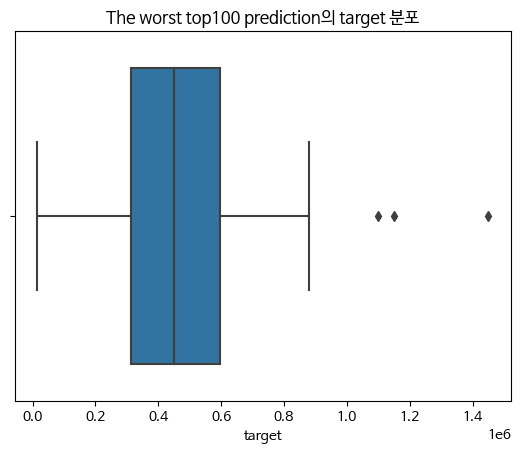

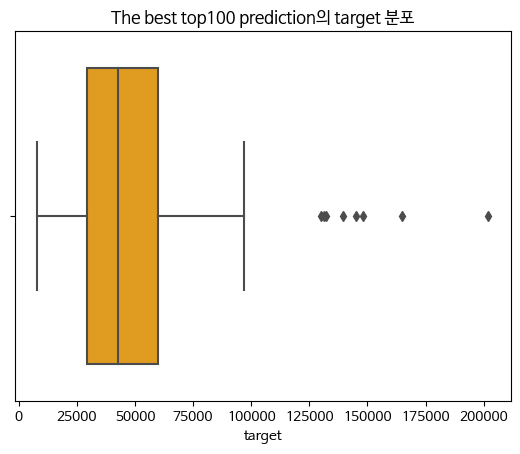

In [109]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

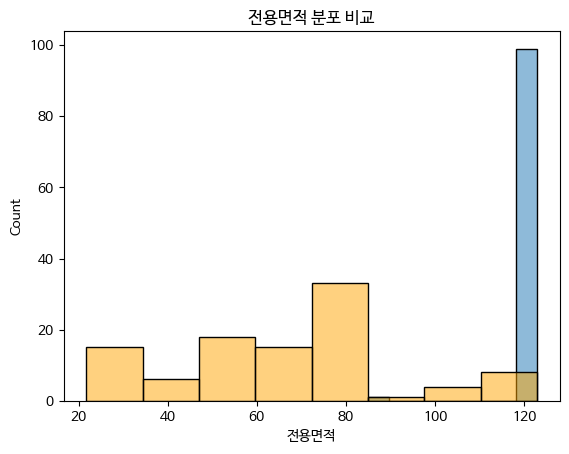

In [110]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

In [111]:
# inference

In [112]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨    Î≤àÏßÄ  ÏïÑÌååÌä∏Î™Ö      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò  \
0    0  4732   328   79.9700   26   5  1987                   3    270.0   
1    0  4707   329  108.2017   15  10  2021                   3    232.0   

   k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  k-ÏãúÌñâÏÇ¨  k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å     Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò         Ï¢åÌëúX  \
0         241    215             29   20204.0  4858.00  262.0  127.057210   
1         289     83            660   24878.0  2724.46  305.0  127.056394   

         Ï¢åÌëúY  target  Íµ¨  Îèô  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  ÏÑ∏ÎåÄÎãπ_Ï£ºÏ∞®ÎåÄÏàò  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Ïã†Ï∂ïÏó¨Î∂Ä  
0  37.476763     NaN  0  8                   250.0  0.966790   16    6     0  
1  37.484892     NaN  0  8                     0.0  1.309013   16    7     1

In [113]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model_com2', 'rb') as f:
    model = pickle.load(f)

In [114]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

CPU times: user 20.9 ms, sys: 3.82 ms, total: 24.7 ms
Wall time: 18.2 ms


In [115]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([186200., 327886., 360200., ...,  90000.,  78200.,  75160.])

In [116]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output_com2.csv', index=False)